# Tutorial oversampling of speckle patterns

### Tutor: Julio C. da Silva (Néel Institute CNRS, Grenoble, France) /  email: julio-cesar.da-silva@neel.cnrs.fr
#### Personal webpage: https://sites.google.com/view/jcesardasilva

##### Disclaimer: This notebook is intended from educational reasons only and should not be use for professional data analysis. For the latter, there are other more efficient and complete codes available. 

This code run in **Python3** and requires certain python packages, which are: **Numpy, IPython, Matplotlib, Scikit-Image**

If you do not have those packages, I suggest their installation via pip install: 

    pip3 install numpy, ipython, matplotlib, scikit-image

## Oversampling the speckle patterns
This code is inspired by the "Tutorial in Diffraction Imaging" by Gösta Huldt and Filipe Maia (originally in MATLAB), which was available until recenlty at http://xray.bmc.uu.se/~ekeberg/molbiofys/tutorial.pdf.

In [1]:
%matplotlib inline
#%matploblib notebook # uncomment this line if you want to "manipulate" the images
# standard python packages
import time

# third party packages
from IPython import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import numpy as np
from skimage.restoration import unwrap_phase

# local packages
from tutorial_tools import drawmol, pdbreadatom, moltrans

## Let's use the molecule of caffeine as sample

Creating dictionary of elements from the name of the atoms


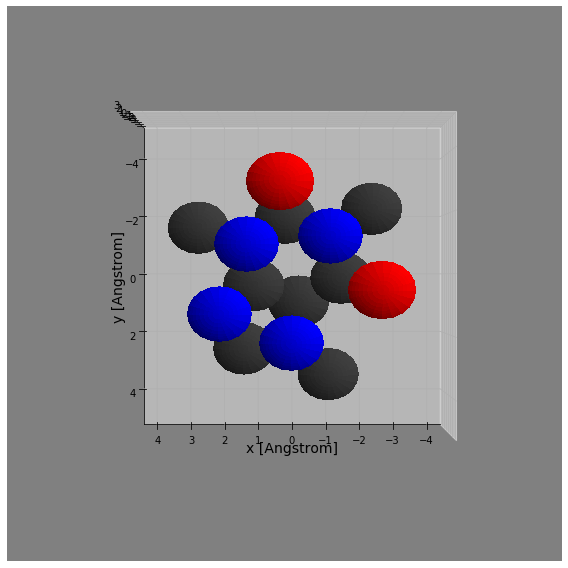

The size of the support of the molecule is about 6.646 Angstrom


In [2]:
molecule = 'caffeine.pdb'
#molecule = 'lysozyme.pdb' # if you have enough RAM memory, you can try this one

# load the molecule coordinate
atom = pdbreadatom(molecule) # the coordinates are given in Angstrom
# finding the size of the object (molecule)
minsize = atom['crd'].min()
maxsize = atom['crd'].max()
# display molecule
drawmol(atom,backgroundColor='grey')
molsize = 2*np.max((minsize,maxsize)) # size image containing the molecule
print('The size of the support of the molecule is about {} Angstrom'.format(molsize))

## Oversampling Speckle patterns

In [3]:
# Parameters (simplified for convenience)
overf = 6 # oversampling factor
step=1/(overf*molsize) # Distance between samples in the Fourier space
cutOff = 4  # Frequency cutoff (maximun frequency you can acquire on the detector)

## sampling the reciprocal space
h = np.arange(-cutOff, cutOff, step) # h-axis
k = h # k-axis (supposing square arrays)
H,K = np.meshgrid(h,k) # Construct a two-dimensional grid.
L = np.zeros_like(K)

# Fourier transform of the molecule taking into account
# the scattering factor of each atom
F_original = moltrans(atom, H,K,L)

## Since we can only acquire Intensity, we lose the phases

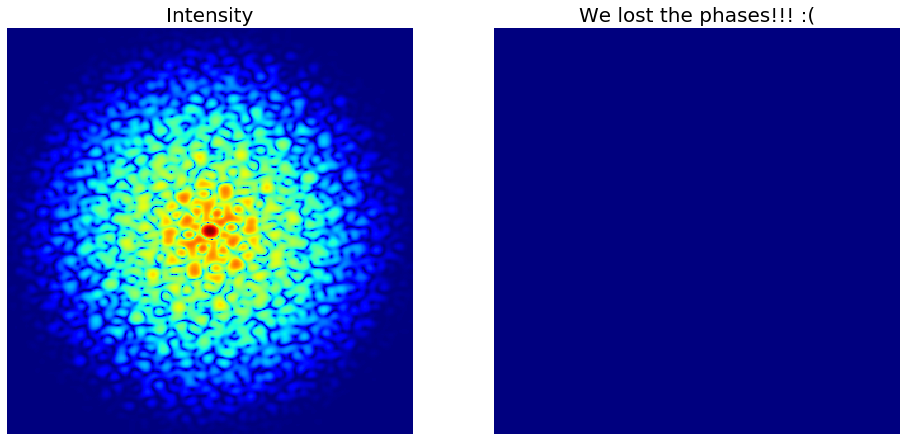

In [4]:
# Convert to intensity
ints = np.abs(F_original)**2 # we lose the phases

# display the Fourier transform
eps = 0.01 # small value to prevent zeros in the log
fig2 = plt.figure(2,figsize=(16,8))
ax21 = fig2.add_subplot(121)
ax21.imshow(np.log(ints+eps),cmap='jet',origin='lower')
ax21.set_title('Intensity',fontsize = 20)
plt.axis('off')
ax22 = fig2.add_subplot(122)
ax22.imshow(np.angle(ints),cmap='jet',origin='lower')
ax22.set_title('We lost the phases!!! :(',fontsize = 20)
plt.axis('off')
plt.show(block=False)

## The ground truth image

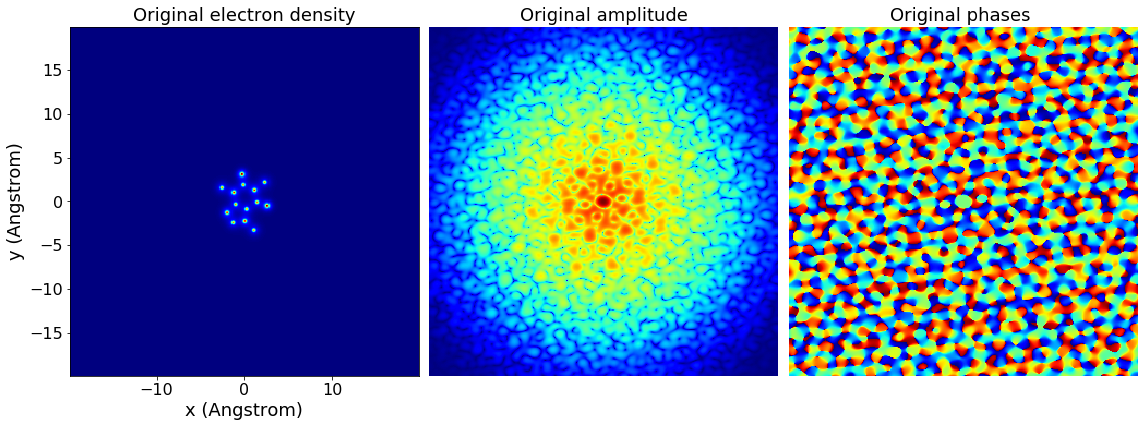

In [5]:
# calculate the electron density
rho_original = np.fft.fftshift(np.abs(np.fft.ifftn(F_original)))

# Create vectors for the x and y coordinates.
x=np.linspace(0,1-1/rho_original.shape[1],rho_original.shape[1])/step
y=np.linspace(0,1-1/rho_original.shape[0],rho_original.shape[0])/step
x = x-x.mean()
y = y-y.mean()
# Draw the image.
fig3 = plt.figure(3,figsize=(16,6))
ax31 = fig3.add_subplot(131)
ax31.imshow(rho_original,extent=[x.min(),x.max(),y.min(),y.max()],cmap='jet', origin='lower')
#ax31.axis([-5,5,-5,5]) # to zoom in, uncomment this line
ax31.set_title('Original electron density',fontsize = 18)
ax31.set_xlabel('x (Angstrom)',fontsize = 18)
ax31.set_ylabel('y (Angstrom)',fontsize = 18)
ax31.tick_params(axis='both',which='major',labelsize=16)
ax32 = fig3.add_subplot(132)
ax32.imshow(np.log(np.abs(F_original)+eps),cmap='jet',origin='lower')
ax32.set_title('Original amplitude',fontsize = 18)
ax32.set_axis_off()
ax33 = fig3.add_subplot(133)
ax33.imshow(np.angle(F_original),cmap='jet',origin='lower')
ax33.set_title('Original phases ',fontsize = 18)
ax33.set_axis_off()
# uncomment line below if you want to check the atoms' coordinates match the plot
#plt.plot(atom['x'],atom['y'],'o')
plt.tight_layout()
plt.show(block=False)
plt.close('all')

### Let us save the intensity and rho to a file for later use

In [6]:
# Let us save this into a .npy file for later
np.save('myints',ints)
# save it for latter use
np.save('myrho.npy',(rho_original-rho_original.min())/(rho_original.max()-rho_original.min()))

### Congratulations! You now know a bit about oversampling of speckles patterns.